In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

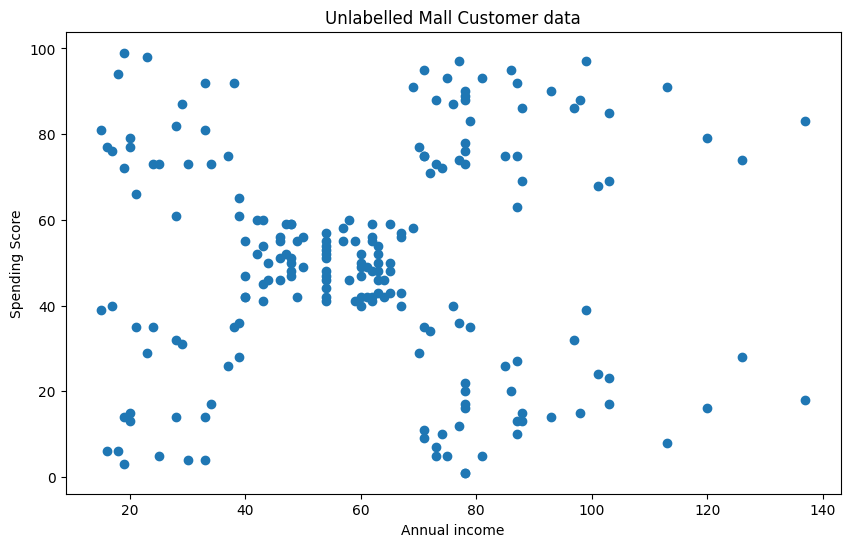

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.title("Unlabelled Mall Customer data")
plt.show()

In [6]:
#Since we are going to use annual income and spending score columns only.lets create 2D array of these columns
X=df.iloc[:,[3,4]].values
X[:5]#show first 5 records only

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [7]:
from itertools import product
eps_values=np.arange(8,13,0.25)
min_samples=np.arange(3,9)
dbscan_params=list(product(eps_values,min_samples)) #gives combination of EPS & MINPOINTS

In [8]:
#Single value of eps,minpoint
X_numeric_feature=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
dbs_cluster_single=DBSCAN(eps=9,min_samples=8).fit(X_numeric_feature)
dbs_cluster_single.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  0,  1,  1,  1,  0,  2,  0,  0,  2,  0,  0,  0,  2,  1,  0,
        2, -1,  0,  1,  0,  0,  0,  2,  1,  1,  2,  1,  0, -1, -1,  1,  2,
        1,  0,  2, -1,  1, -1,  2,  1,  1, -1,  2,  1,  2,  1,  2,  2,  1,
       -1,  2,  1,  2, -1,  1, -1, -1, -1,  2, -1,  2,  2,  2, -1, -1,  1,
       -1,  2, -1, -1, -1, -1,  3, -1, -1, -1,  3, -1,  3, -1,  3, -1,  4,
       -1,  3, -1,  3, -1,  4, -1,  4, -1,  4, -1,  3, -1,  4, -1,  4, -1,
        3, -1,  4, -1,  3, -1,  3, -1,  3, -1,  4, -1,  3, -1,  4, -1, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [9]:
np.unique(dbs_cluster_single.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [10]:
len(np.unique(dbs_cluster_single.labels_))

6

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X_numeric_feature,dbs_cluster_single.labels_)

-0.06361003273116211

In [12]:
#dbscan params

In [13]:
from sklearn.metrics import silhouette_score
X_numeric_feature = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
sil_score = []
no_of_clusters = []

for k in dbscan_params:
    dbs_cluster = DBSCAN(eps=k[0],min_samples=k[1]).fit(X_numeric_feature)
    no_of_clusters.append(len(np.unique(dbs_cluster.labels_)))
    sil_score.append(silhouette_score(X_numeric_feature,dbs_cluster.labels_))

In [14]:
#sil_score

In [15]:
#no_of_clusters

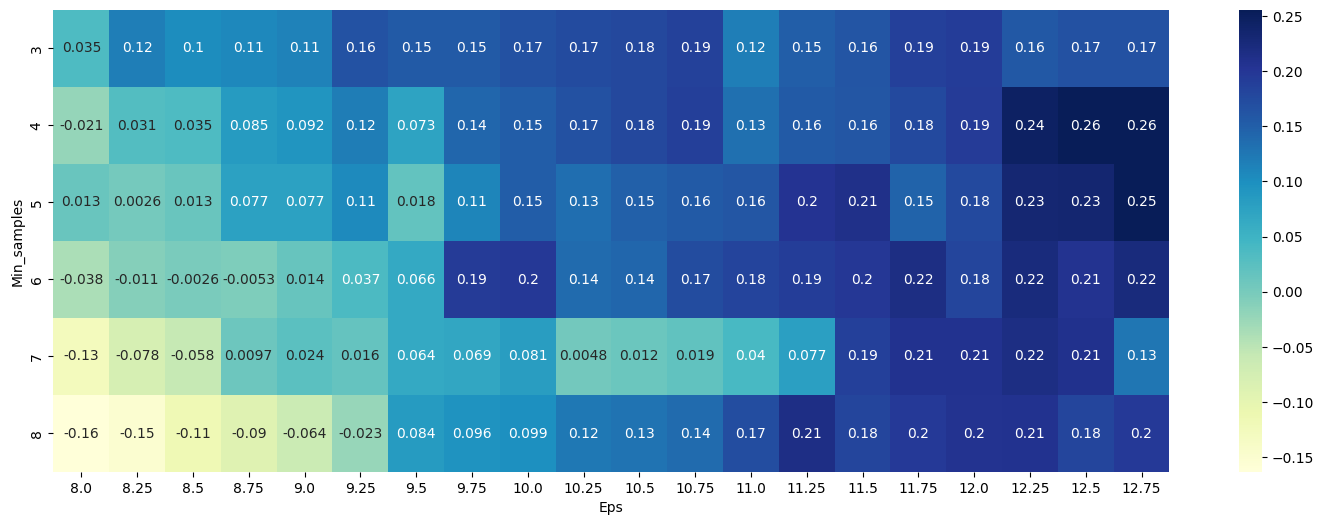

In [16]:
import seaborn as sns
temp=pd.DataFrame.from_records(dbscan_params,columns=["Eps","Min_samples"])
temp["sil_score"]=sil_score


plt.figure(figsize=(18,6))
pivot=pd.pivot_table(temp,values="sil_score",index="Min_samples",columns="Eps")
sns.heatmap(pivot,annot=True,cmap="YlGnBu")
plt.show()

In [17]:
#Global Maxima is 0.26 for eps=12.75 and min_sample =4

In [18]:
dbs_cluster_final=DBSCAN(eps=12.75,min_samples=4).fit(X_numeric_feature)

In [19]:
dbs_clustered=X_numeric_feature.copy()
dbs_clustered.loc[:,"cluster"]=dbs_cluster_final.labels_
dbs_clustered

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [20]:
dbs_cluster_size=dbs_clustered.groupby("cluster").size().to_frame()
dbs_cluster_size.columns=["dbs_size"]
dbs_cluster_size

,dbs_size
cluster,
-1,17
0,113
1,8
2,34
3,24
4,4


In [21]:
outliers=dbs_clustered[dbs_clustered["cluster"]==-1]

In [22]:
outliers

,Age,Annual Income (k$),Spending Score (1-100),cluster
2,20,16,6,-1
6,35,18,6,-1
7,23,18,94,-1
10,67,19,14,-1
11,35,19,99,-1
14,37,20,13,-1
19,35,23,98,-1
40,65,38,35,-1
187,28,101,68,-1
191,32,103,69,-1


In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',
                data =dbs_clustered[dbs_clustered['cluster']!=-1],
                hue = 'cluster',palette = 'Set1')
#sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',
                #data =dbs_clustered[dbs_clustered['cluster']==-1],
                #color = 'black',label = 'outlier')
plt.show()

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 1000x700 with 0 Axes>